<a href="https://colab.research.google.com/github/Nhan2014/Nhan20146382/blob/main/ai_w4_24_2_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt



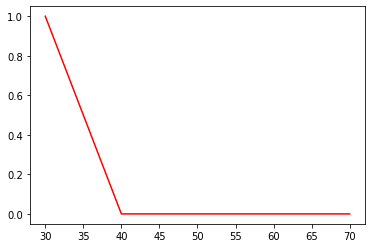

In [ ]:
x=np.arange(30, 71, 1)
slow = fuzz.trimf(x,[30,30, 40])
plt.figure()
plt.plot(x,slow,'r', linewidth=1.5,label='SLOW') 

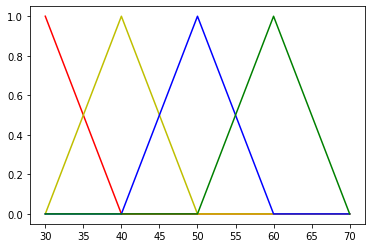

In [ ]:
x=np.arange(30, 71, 1)
slow = fuzz.trimf(x,[30,30, 40])
med = fuzz.trimf(x,[30,40, 50])
med_fas = fuzz.trimf(x,[40,50, 60])
fast = fuzz.trimf(x,[50,60, 70])
plt.figure()
plt.plot(x,slow,'r', linewidth=1.5,label='SLOW') 
plt.plot(x,med,'y', linewidth=1.5,label='MEDIUM')
plt.plot(x,med_fas,'b', linewidth=1.5,label='MEDIUM_FAST')
plt.plot(x,fast,'g', linewidth=1.5,label='FASTEST')

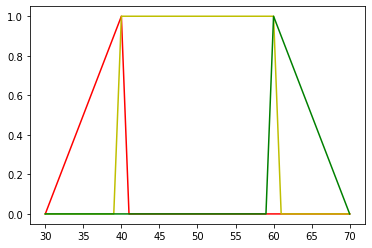

In [ ]:
x=np.arange(30, 71, 1)
slow = fuzz.trimf(x,[30,40, 40])
med = fuzz.trapmf(x,[40,40,60, 60])
fast = fuzz.trimf(x,[60,60, 70])
plt.figure()
plt.plot(x,slow,'r', linewidth=1.5,label='SLOW') 
plt.plot(x,med,'y', linewidth=1.5,label='MEDIUM')
plt.plot(x,fast,'g', linewidth=1.5,label='FASTEST')

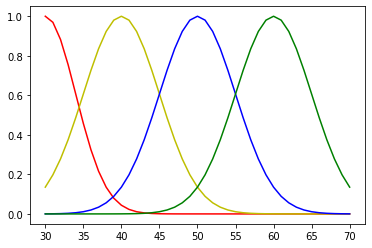

In [ ]:
x=np.arange(30, 71, 1)
slow = fuzz.gaussmf(x,30,4)
med = fuzz.gaussmf(x,40,5)
med_fas = fuzz.gaussmf(x,50, 5)
fast = fuzz.gaussmf(x,60,5)
plt.figure()
plt.plot(x,slow,'r', linewidth=1.5,label='SLOW') 
plt.plot(x,med,'y', linewidth=1.5,label='MEDIUM')
plt.plot(x,med_fas,'b', linewidth=1.5,label='MEDIUM_FAST')
plt.plot(x,fast,'g', linewidth=1.5,label='FASTEST')

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
food= ctrl.Antecedent(np.arange(0,11,1),'food')
service=ctrl.Antecedent(np.arange(0,11,1),'service')
tip=ctrl.Consequent(np.arange(10,31,1),'tip')
food['Poor']=fuzz.trimf(food.universe,[0,0,5])
food['Average']=fuzz.trimf(food.universe,[0,5,10])
food['Good']=fuzz.trimf(food.universe,[5,10,10])
service['Bad']=fuzz.trimf(service.universe,[0,0,5])
service['Normal']=fuzz.trimf(service.universe,[0,5,10])
service['Good']=fuzz.trimf(service.universe,[5,10,10])
tip['Less']=fuzz.trimf(tip.universe,[10,10,18])
tip['Normal']=fuzz.trimf(tip.universe,[15,20,25])
tip['Much']=fuzz.trimf(tip.universe,[23,30,30])

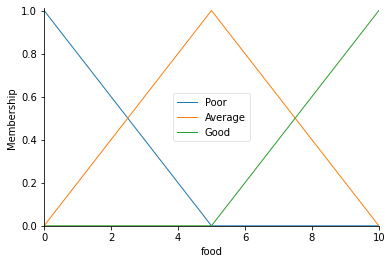

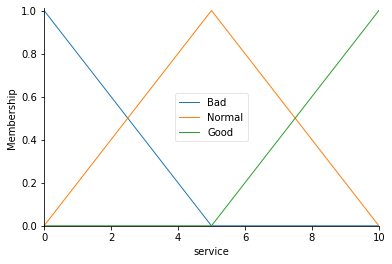

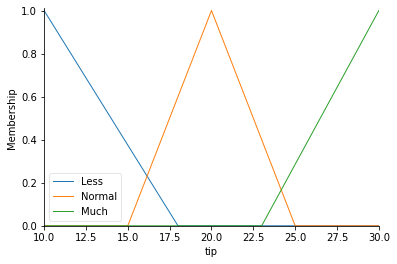

In [ ]:
food.view()
service.view()
tip.view()

In [ ]:
rule1=ctrl.Rule(food['Poor']& service['Bad'], tip['Less'])
rule2=ctrl.Rule(food['Average']& service['Bad'], tip['Less'])
rule3=ctrl.Rule(food['Good']& service['Bad'], tip['Normal'])
rule4=ctrl.Rule(food['Poor']& service['Normal'], tip['Normal'])
rule5=ctrl.Rule(food['Average']& service['Normal'], tip['Normal'])
rule6=ctrl.Rule(food['Good']& service['Normal'], tip['Much'])
rule7=ctrl.Rule(food['Poor']& service['Good'], tip['Normal'])
rule8=ctrl.Rule(food['Average']& service['Good'], tip['Much'])
rule9=ctrl.Rule(food['Good']& service['Good'], tip['Much'])



19.999999999999993


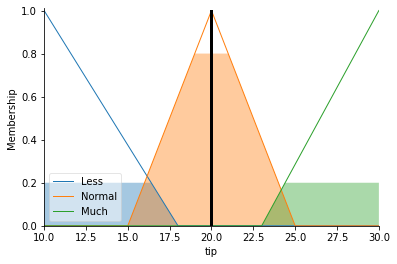

In [ ]:
tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 6
tipping.input['service'] = 4
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

In [ ]:
time= ctrl.Antecedent(np.arange(0,180,1),'time')
rice=ctrl.Antecedent(np.arange(100,1000,1),'rice')
capacity=ctrl.Consequent(np.arange(0,100,1),'capacity')
time['0p']=fuzz.trimf(time.universe,[0,0,45])
time['45p']=fuzz.trimf(time.universe,[0,45,90])
time['90p']=fuzz.trimf(time.universe,[45,90,135])
time['135p']=fuzz.trimf(time.universe,[90,135,180])
time['180p']=fuzz.trimf(time.universe,[135,180,180])
rice['100g']=fuzz.trimf(rice.universe,[0,0,250])
rice['250g']=fuzz.trimf(rice.universe,[0,250,500])
rice['500g']=fuzz.trimf(rice.universe,[250,500,750])
rice['750g']=fuzz.trimf(rice.universe,[500,750,1000])
rice['1000g']=fuzz.trimf(rice.universe,[750,1000,1000])
capacity['0%']=fuzz.trimf(capacity.universe,[0,5,25])
capacity['25%']=fuzz.trimf(capacity.universe,[0,15,50])
capacity['50%']=fuzz.trimf(capacity.universe,[20,30,75])
capacity['75%']=fuzz.trimf(capacity.universe,[40,50,90])
capacity['100%']=fuzz.trimf(capacity.universe,[45,60,100])



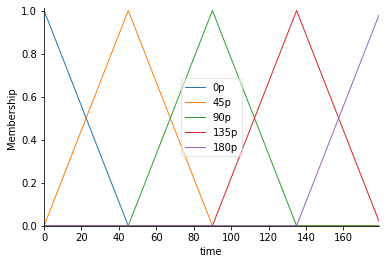

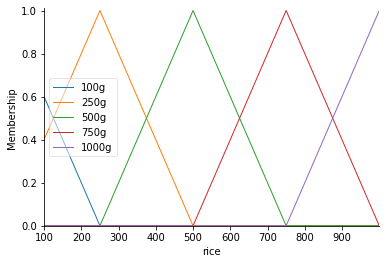

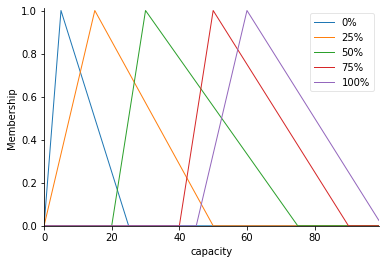

In [ ]:
time.view()
rice.view()
capacity.view()

In [ ]:
rule1=ctrl.Rule(time['0p'] & rice['100g'], capacity['0%'])
rule2=ctrl.Rule(time['45p'] & rice['100g'], capacity['25%'])
rule3=ctrl.Rule(time['90p'] & rice['100g'], capacity['50%'])
rule4=ctrl.Rule(time['135p'] & rice['100g'], capacity['50%'])
rule5=ctrl.Rule(time['180p'] & rice['100g'], capacity['75%'])

rule6=ctrl.Rule(time['0p'] & rice['250g'], capacity['25%'])
rule7=ctrl.Rule(time['45p'] & rice['250g'], capacity['25%'])
rule8=ctrl.Rule(time['90p'] & rice['250g'], capacity['50%'])
rule9=ctrl.Rule(time['135p'] & rice['250g'], capacity['75%'])
rule10=ctrl.Rule(time['180p'] & rice['250g'], capacity['75%'])

rule11=ctrl.Rule(time['0p'] & rice['500g'], capacity['50%'])
rule12=ctrl.Rule(time['45p'] & rice['500g'], capacity['50%'])
rule13=ctrl.Rule(time['90p'] & rice['500g'], capacity['50%'])
rule14=ctrl.Rule(time['135p'] & rice['500g'], capacity['75%'])
rule15=ctrl.Rule(time['180p'] & rice['500g'], capacity['100%'])

rule16=ctrl.Rule(time['0p'] & rice['750g'], capacity['50%'])
rule17=ctrl.Rule(time['45p'] & rice['750g'], capacity['50%'])
rule18=ctrl.Rule(time['90p'] & rice['750g'], capacity['75%'])
rule19=ctrl.Rule(time['135p'] & rice['750g'], capacity['75%'])
rule20=ctrl.Rule(time['180p'] & rice['750g'], capacity['100%'])

rule21=ctrl.Rule(time['0p'] & rice['1000g'], capacity['75%'])
rule22=ctrl.Rule(time['45p'] & rice['1000g'], capacity['75%'])
rule23=ctrl.Rule(time['90p'] & rice['1000g'], capacity['75%'])
rule24=ctrl.Rule(time['135p'] & rice['1000g'], capacity['100%'])
rule25=ctrl.Rule(time['180p'] & rice['1000g'], capacity['100%'])

20.455958549222785


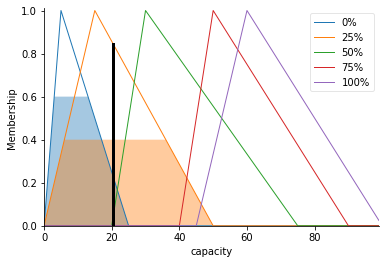

In [ ]:
cap_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
cap=ctrl.ControlSystemSimulation(cap_ctrl)
cap.input['time'] = 0
cap.input['rice'] = 100
cap.compute()
print(cap.output['capacity'])
capacity.view(sim=cap)